# Fancy Indexing 
Fancy indexing is a way to access specific elements from a NumPy array using a list or array of index numbers, instead of just using slices like a[1:5]      
Think of it like saying:
“Give me the 2nd, 4th, and 5th elements — all at once.”
It gives you more control and flexibility over which items you pick.



In [19]:
import numpy as np
arr = np.array([10, 20, 30, 40, 50])

arr

array([10, 20, 30, 40, 50])

In [21]:
# 1D array
indices = [0, 2, 4]

print(arr[indices])

[10 30 50]


In [23]:
#2D array
a = np.arange(24).reshape(6,4)
a[[0,2,3]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [25]:
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

# Boolean Indexing
Boolean indexing means selecting elements from a NumPy array based on conditions — like "extracting all the numbers greater than 50."   
It uses True and False values (called a boolean array) to decide which elements to keep.



In [29]:
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[58, 13, 92, 12],
       [83, 53,  1, 23],
       [75, 24, 96, 89],
       [88, 21, 42, 56],
       [90, 70, 36, 56],
       [88, 38,  1, 19]])

In [31]:
# Booolean Masking:
arr = np.array([10, 20, 30, 40, 50])

# Create a boolean mask for values greater than 30
mask = arr > 30

# Use the mask to filter the array
print(arr[mask])

[40 50]


In [35]:
# find all numbers greater than 50
a[a > 50]

array([58, 92, 83, 53, 75, 96, 89, 88, 56, 90, 70, 56, 88])

In [37]:
# find out even numbers
a[a % 2 == 0]

array([58, 92, 12, 24, 96, 88, 42, 56, 90, 70, 36, 56, 88, 38])

In [39]:
# find all numbers greater than 50 and are even

a[(a > 50) & (a % 2 == 0)]

array([58, 92, 96, 88, 56, 90, 70, 56, 88])

In [41]:
# find all numbers not divisible by 7
a[~(a % 7 == 0)]

array([58, 13, 92, 12, 83, 53,  1, 23, 75, 24, 96, 89, 88, 90, 36, 88, 38,
        1, 19])

# Broadcasting
Broadcasting in NumPy just means that NumPy can handle arrays with different shapes during operations—by "stretching" the smaller one automatically to match the bigger one.   
You don't have to reshape anything yourself. If the shapes are compatible (same size or 1 in a dimension), NumPy fills in the gaps for you and does the operation.

In [46]:
# same shape

a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)
print(a,"\n")
print(b,"\n")

print(a+b)

[[0 1 2]
 [3 4 5]] 

[[ 6  7  8]
 [ 9 10 11]] 

[[ 6  8 10]
 [12 14 16]]


In [48]:
# Different Shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)
print(a,"\n")
print(b,"\n")

print(a+b)

[[0 1 2]
 [3 4 5]] 

[[0 1 2]] 

[[0 2 4]
 [3 5 7]]


## Broadcasting Rules
**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

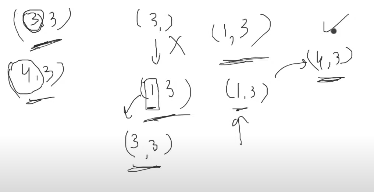

In [58]:
# More examples
# POSSIBLE  
a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a,"\n")
print(b,"\n")

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 

[0 1 2] 

[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [ ]:
# NOT POSSIBLE
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a,"\n")
print(b,"\n")

print(a+b)

explanation-----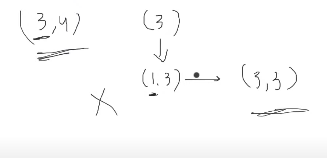

In [61]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


explanation----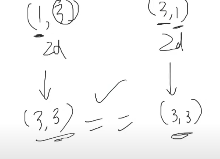

In [64]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


explanation----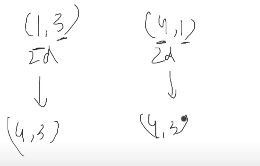

In [67]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [73]:
# Not possible
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [75]:
# Not possible
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

# Working with mathematical formula

In [80]:
import numpy as np
a = np.arange(10)
print(np.sum(a))
print(np.sin(a))

45
[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]


## Sigmoid
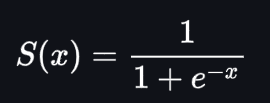

In [88]:
# sigmoid
def sigmoid(array):
  return 1/(1 + np.exp(-(array)))


a = np.arange(100)

sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

# Mean Squared Error
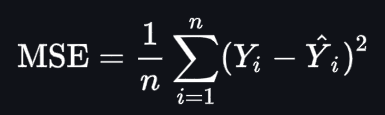

In [92]:
# mean squared error

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

In [94]:
def mse(actual,predicted):
  return np.mean((actual - predicted)**2)

mse(actual,predicted)

513.8

# Working with missing values

## np.nan
np.nan in NumPy represents "Not a Number", which is a special floating-point value used to denote missing or undefined data.

In [99]:
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [102]:
#Checking for nan:
np.isnan(a)

array([False, False, False, False,  True, False])

In [106]:
a[~np.isnan(a)]  # return array without missing values

array([1., 2., 3., 4., 6.])

# Plotting graphs


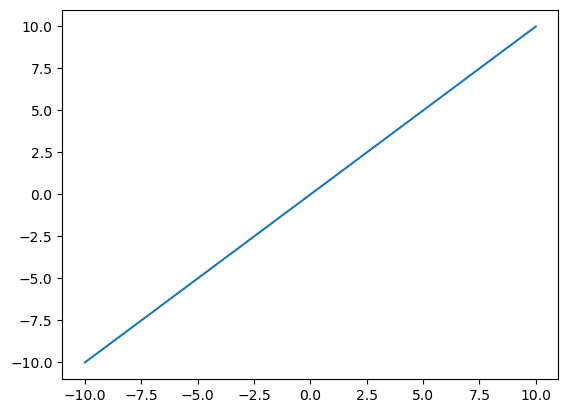

In [111]:
# plotting a 2D plot
# x = y
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = x

plt.plot(x,y)

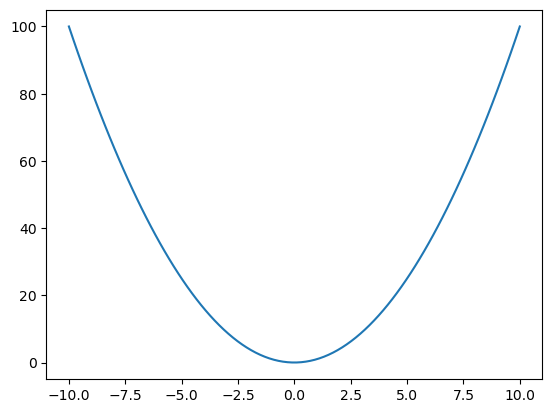

In [113]:
# y = x^2
x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)

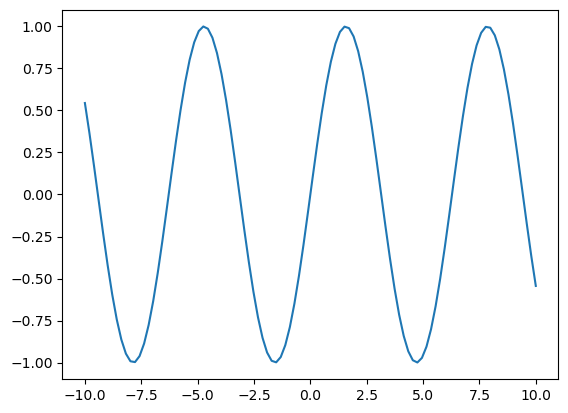

In [115]:
# y = sin(x)
x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

C:\Users\hp\AppData\Local\Temp\ipykernel_13476\2564014901.py:3: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


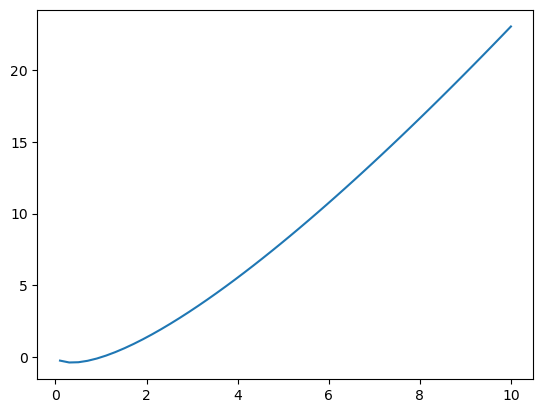

In [119]:
# y = xlog(x)
x = np.linspace(-10,10,100)
y = x * np.log(x)

plt.plot(x,y)

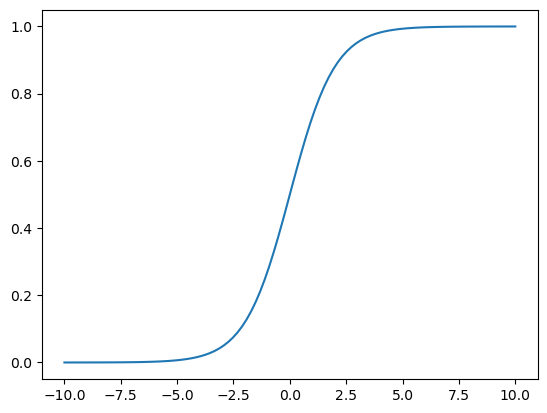

In [121]:
# sigmoid
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y)